<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering With Seeds Data

_Authors: Joseph Nelson (DC), Haley Boyan (DC), Sam Stack (DC)_

---

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1) Import the data.

In [2]:
seeds = pd.read_csv("./datasets/seeds.csv")

In [3]:
seeds.head(1)

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1


In [4]:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
area               210 non-null float64
perimeter          210 non-null float64
compactness        210 non-null float64
length             210 non-null float64
width              210 non-null float64
asymmetry_coeff    210 non-null float64
groove_length      210 non-null float64
species            210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [5]:
seeds.species.value_counts()

3    70
2    70
1    70
Name: species, dtype: int64

### 2) Perform some exploratory data analysis of relationships between features.

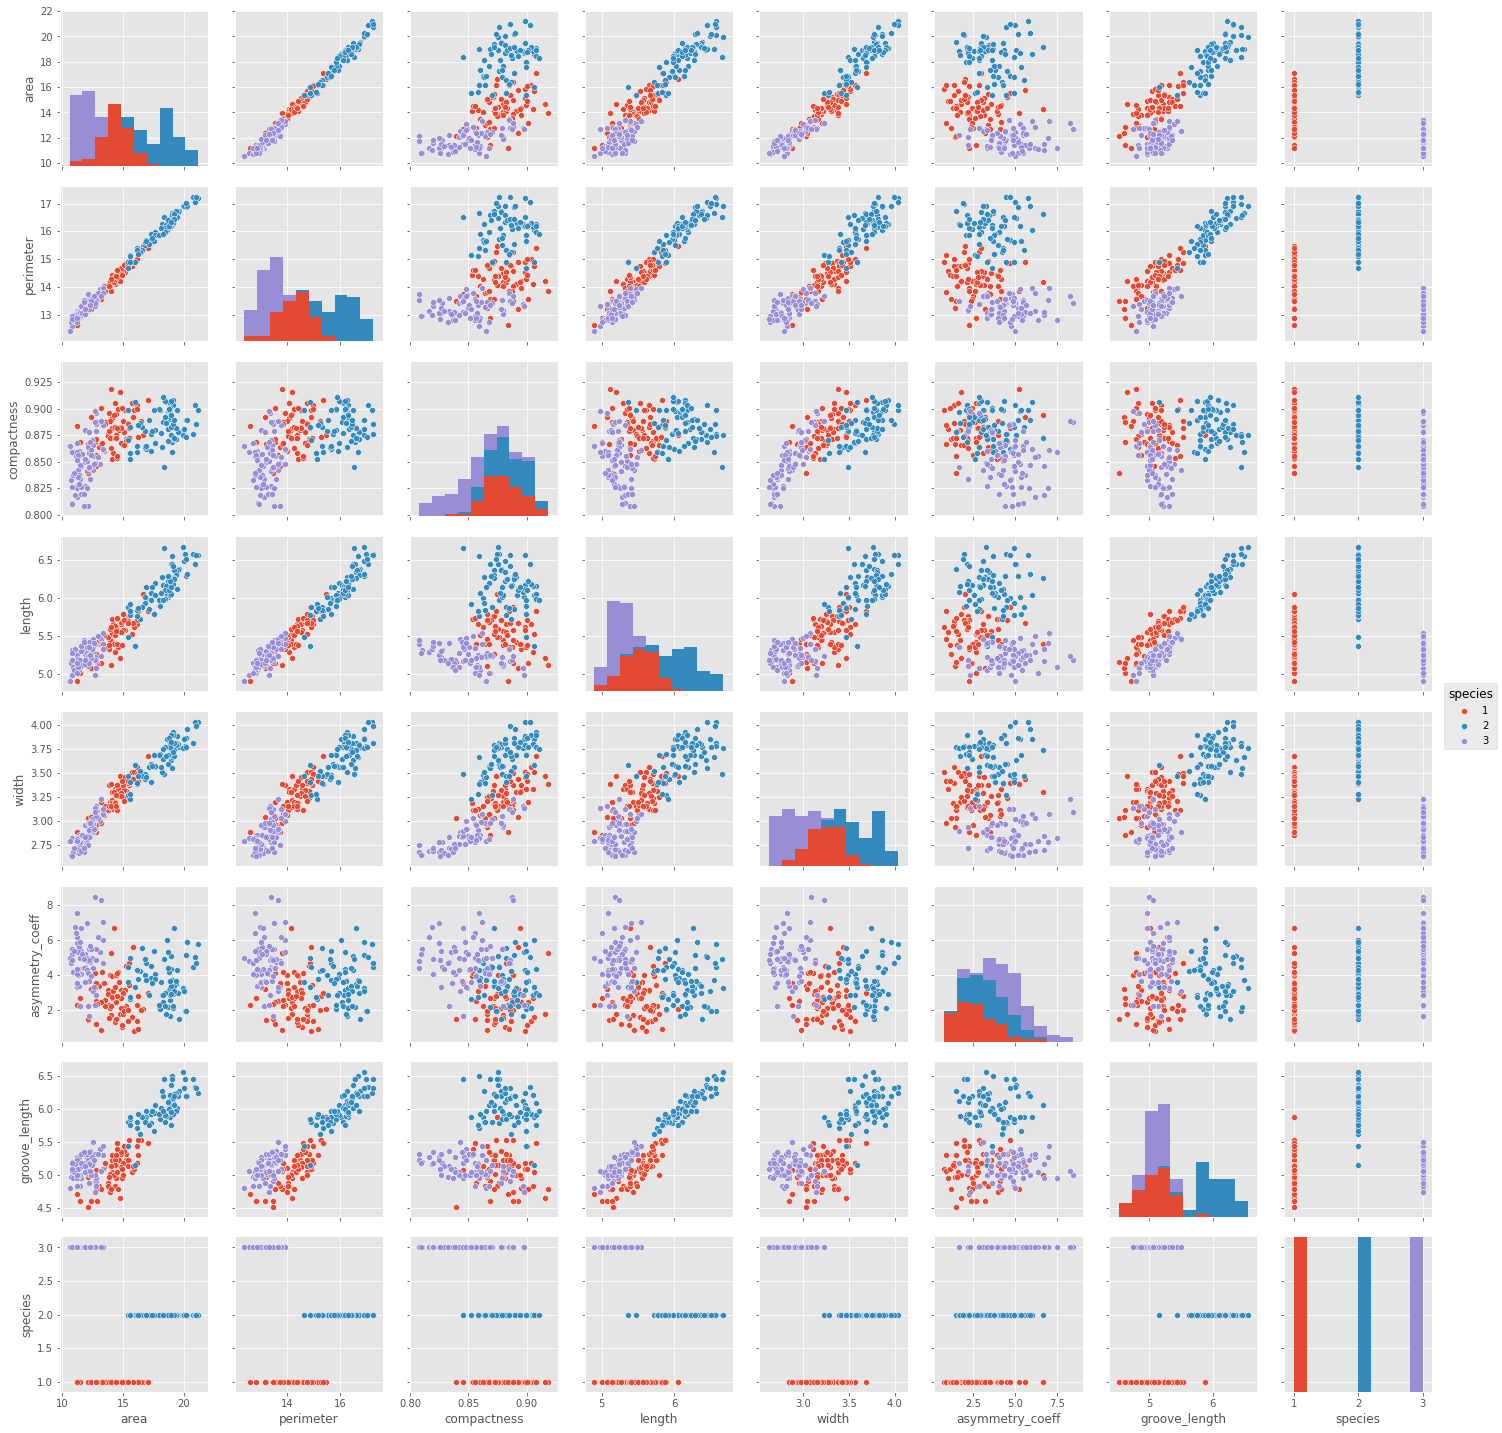

In [7]:
sns.pairplot(seeds, hue='species')

In [2]:
# Check for NULLs.

In [3]:
# Look at the real species labels.

Remember, clustering is an unsupervised learning method, so known classes will never exist. In this situation, we can see that `perimeter` vs. `groove_length` is a good visualization to view the proper classes and can be used later to compare the results of clustering to a true value.

### 3) Prepare the data for clustering.

1) Remove the `species` column. We'll see if the clusters from k-means end up like the actual species.
2) Put the features on the same scale.

In [9]:
X = seeds.drop('species', axis=1)

### 4) Cluster with k-means.

- Cluster the data to our target groups.
- We know that there are three actual classes. However, in a real situation where we'd use clustering, we would have no idea how many classes existed. Let's first try using the default `k` for `KMeans`(8).

In [52]:
from sklearn.preprocessing import StandardScaler
Xs = StandardScaler().fit_transform(X)
Xs = pd.DataFrame(Xs, columns = X.columns.values)

In [53]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=8, random_state=0).fit(Xs)
predicted = model.labels_
centroids = model.cluster_centers_
Xs['predicted'] = predicted

print "Predicted clusters to points: ", predicted
print "Location of centroids: "
print centroids

Predicted clusters to points:  [6 6 3 3 3 3 6 3 5 5 5 6 3 6 6 3 3 3 3 1 6 6 3 1 6 6 1 1 6 1 6 6 6 6 6 3 5
 5 6 7 3 6 3 5 3 6 6 3 6 6 6 5 6 6 6 6 3 3 6 1 1 1 1 1 1 3 6 6 6 1 5 5 5 4
 5 5 5 0 0 5 5 0 0 4 4 4 4 0 0 0 4 4 4 0 0 5 0 4 4 4 5 4 0 0 4 4 4 5 0 4 4
 0 4 0 0 4 4 4 4 0 0 4 5 4 3 4 0 4 4 5 4 4 5 5 5 3 5 5 5 5 7 7 7 7 2 2 1 1
 1 2 7 2 2 2 2 2 1 2 2 2 1 1 2 1 7 1 7 1 2 2 2 7 2 2 2 7 2 2 7 1 7 7 7 7 7
 2 2 2 7 7 2 1 1 2 1 7 7 7 1 3 7 3 1 7 1 1 1 7 1 7]
Location of centroids: 
[[ 1.64556535  1.66047756  0.4452605   1.71036309  1.45520743  0.62861421
   1.66067624]
 [-0.91351484 -0.9326448  -0.46027843 -0.89113498 -0.89072321 -0.30450505
  -0.82181332]
 [-1.19621321 -1.08446137 -1.87444978 -0.85268576 -1.44709243  0.83244104
  -0.50741772]
 [-0.12002128 -0.25074116  1.1570542  -0.58687469  0.26216258 -0.70521625
  -0.87634574]
 [ 1.37576173  1.33846846  0.83809979  1.27720883  1.30581757 -0.67644501
   1.33975556]
 [ 0.571446    0.63420397  0.20651071  0.62899916  0.53840009  0.1686345


### 5) Get the labels and centroids for our first clustering model.

In [54]:
# A:

### 6) Compute the silhouette score and visually examine the results of the eight clusters.

_`pairplot` with hue._

In [55]:
from sklearn.metrics import silhouette_score

score = silhouette_score(Xs, Xs['predicted'], metric='euclidean') #High silhouette score = clusters are well separated. The score is based on how much closer data points are to their own clusters than to the nearest neighbor cluster.
score

0.47590437305659417

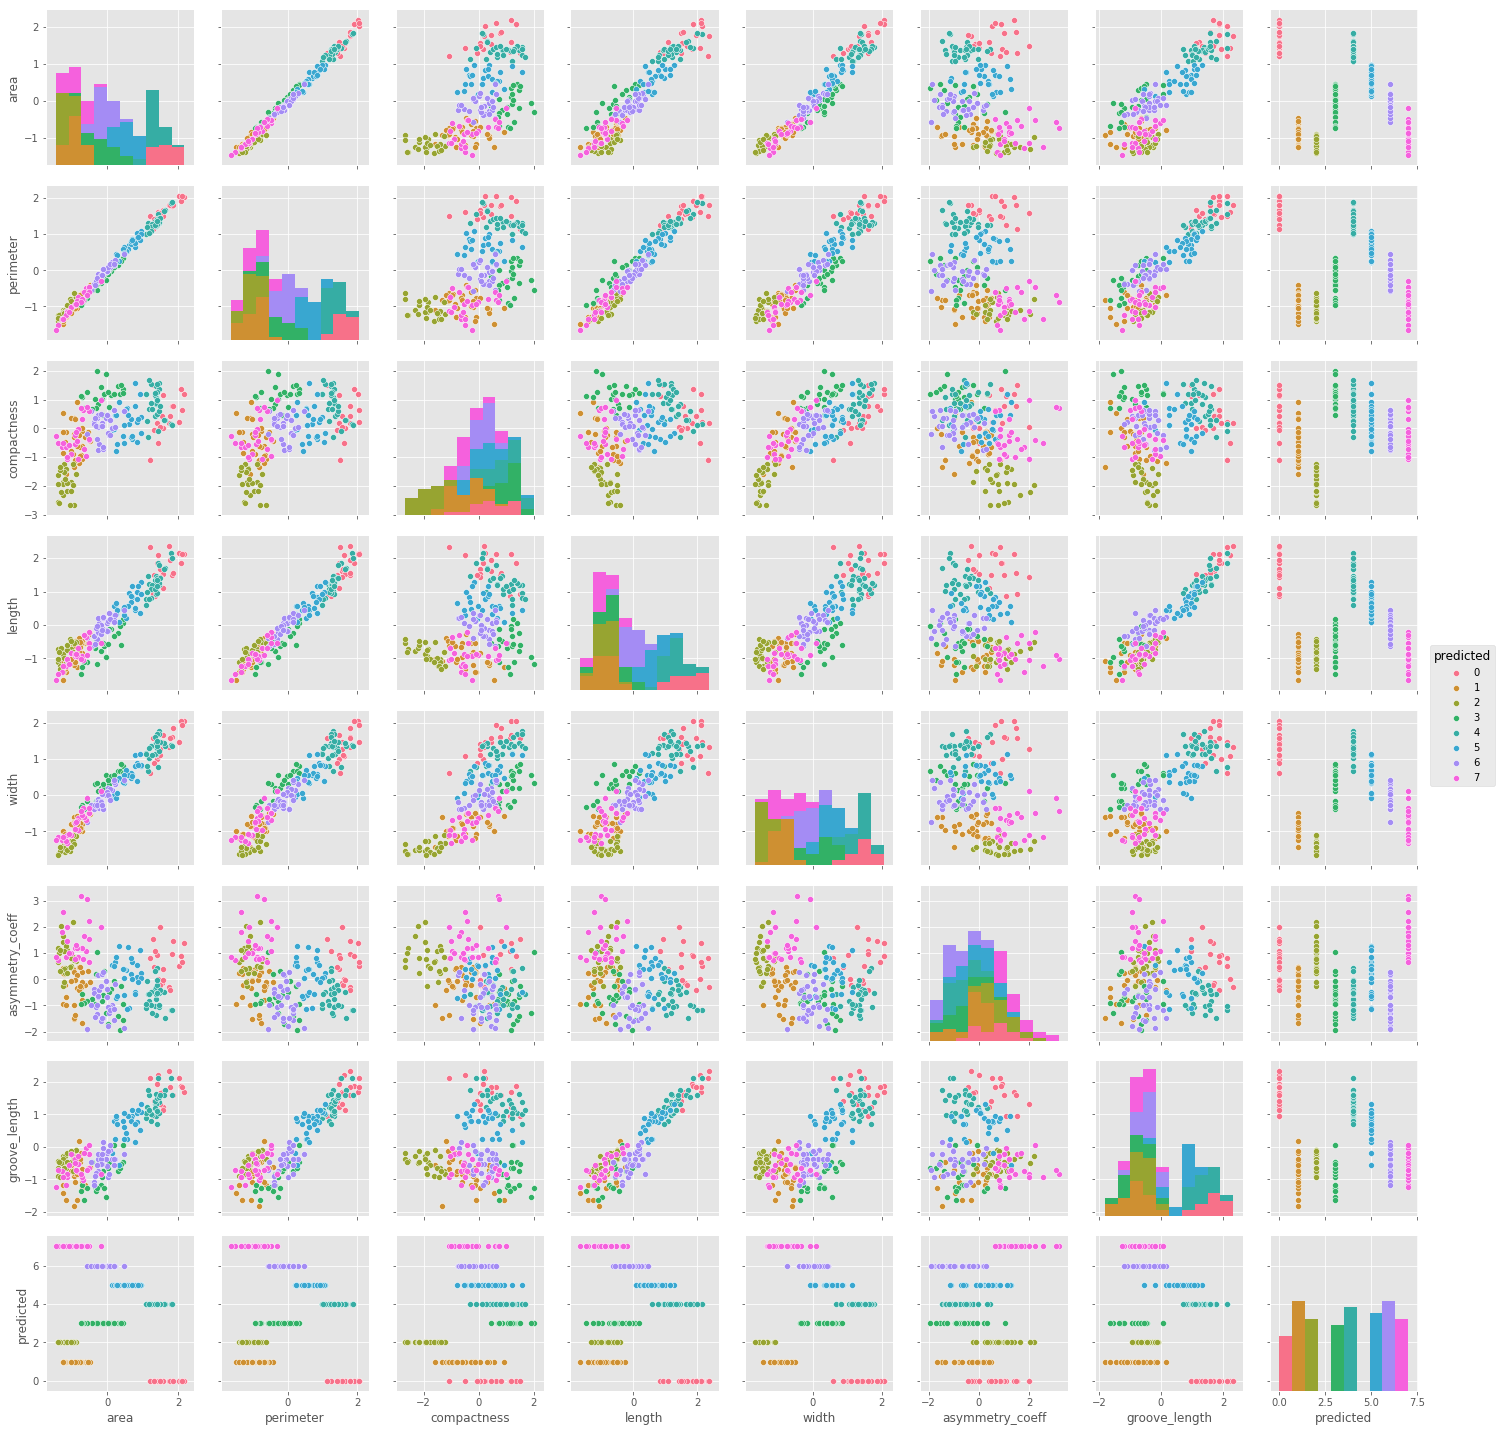

In [14]:
sns.pairplot(Xs, hue='predicted')

### 7) Repeat Steps 4 and 6 with two selected or random `k` values and compare the results to the `k=8` model.

In [20]:
import random

random.randint(1,25), random.randint(1,25)

(20, 15)

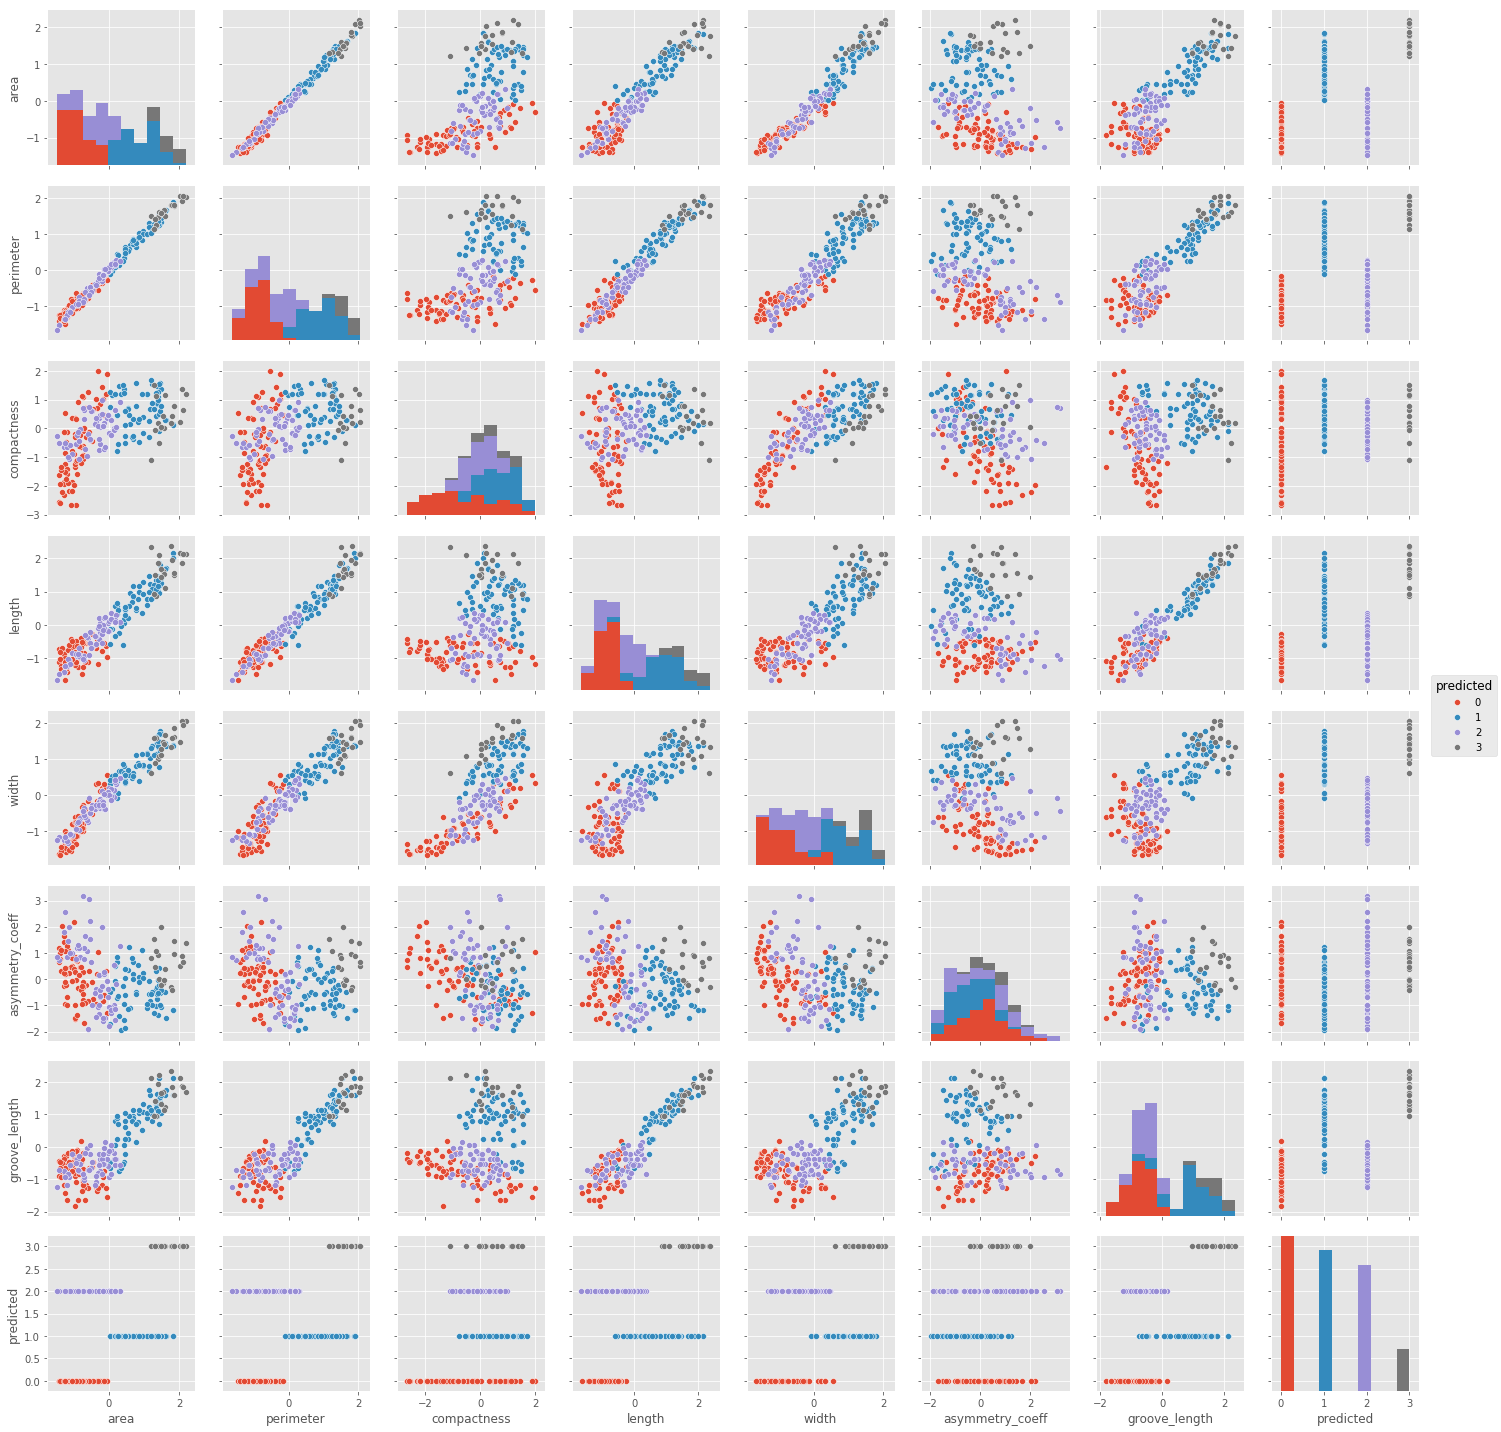

In [21]:
model = KMeans(n_clusters=4, random_state=0).fit(Xs)
predicted = model.labels_
centroids = model.cluster_centers_
Xs['predicted'] = predicted
score = silhouette_score(Xs, predicted, metric='euclidean') #High silhouette score = clusters are well separated. The score is based on how much closer data points are to their own clusters than to the nearest neighbor cluster.
score

sns.pairplot(Xs, hue='predicted')

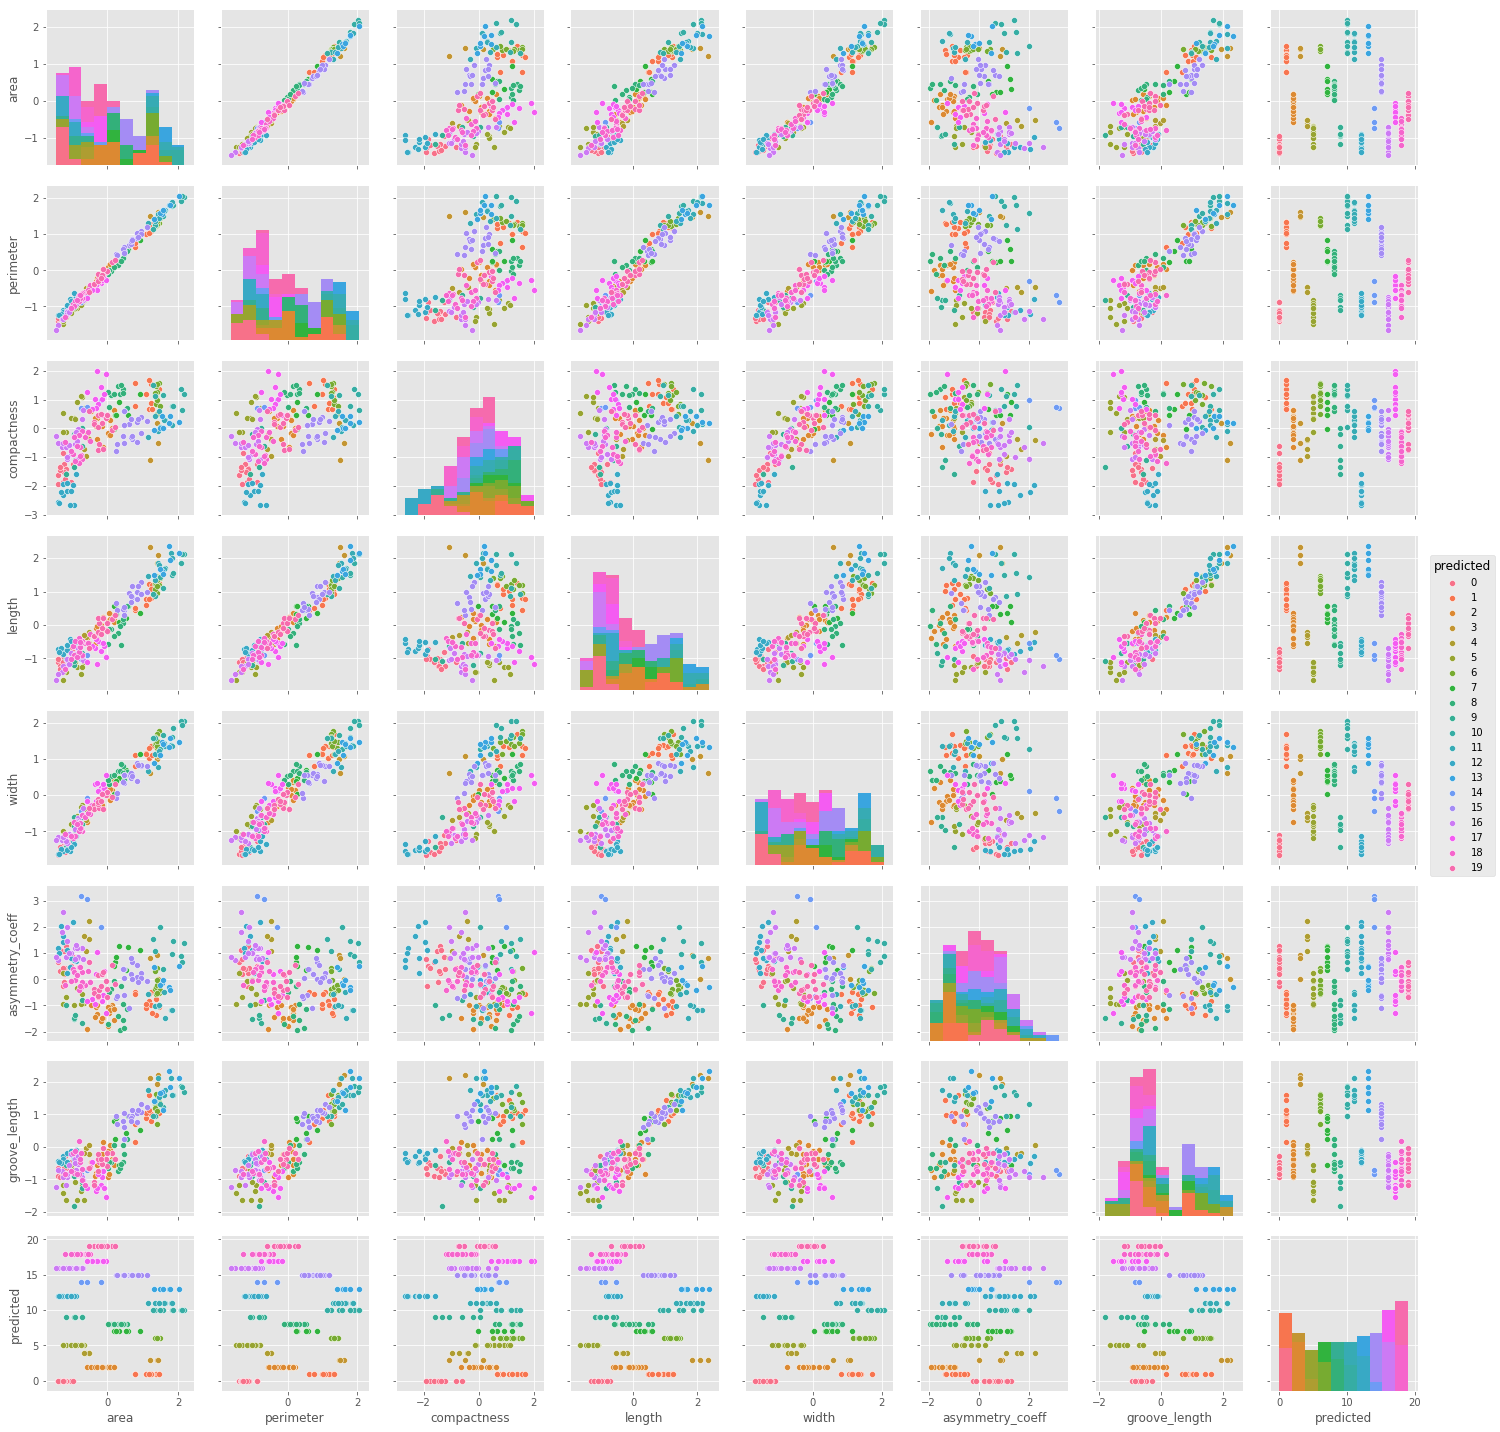

In [22]:
model = KMeans(n_clusters=20, random_state=0).fit(Xs)
predicted = model.labels_
centroids = model.cluster_centers_
Xs['predicted'] = predicted
score = silhouette_score(Xs, predicted, metric='euclidean') #High silhouette score = clusters are well separated. The score is based on how much closer data points are to their own clusters than to the nearest neighbor cluster.
score

sns.pairplot(Xs, hue='predicted')

### 8) Build a function to find the optimal number of clusters, using silhouette score as the criteria.

1) The function should accept a range and a DataFrame as arguments.
2) It returns the optimal `k` value, the associated silhouette, and the scaling method.
3) Your function should also consider the scaled results of the data. 
    - `normalize`, `StandardScaler`, and `MinMaxScaler`.


Once you've found the optimal `k` and version of the data, visualize the clusters.





In [ ]:
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [59]:
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
Xs = scaling().fit_transform(X)
Xs = pd.DataFrame(Xs, columns = X.columns.values)

NameError: name 'scaling' is not defined

In [160]:
def opt_clusters(X, scaling, k=11):
inertia = []
silh = []
Xs = scaling().fit_transform(X)
Xs = pd.DataFrame(Xs, columns = X.columns.values)
for i in range(1,k):
    model = KMeans(n_clusters=i, random_state=0).fit(Xs)
    predicted = model.labels_
    inertia.append(model.inertia_)
    if i>1:
        silh.append(silhouette_score(Xs, predicted, metric='euclidean')) #High silhouette score = clusters are well separated. The score is based on how much closer data points are to their own clusters than to the nearest neighbor cluster.  
plt.plot(np.arange(1, k, step=1), inertia)
plt.title('Innertia vs clusters')
plt.xlabel('No. of clusters')
plt.ylabel('Within Clusters Sum-sq (WCSS)')
plt.show()

plt.scatter(np.arange(2, k, step=1), silh)
plt.title('Sihouette vs clusters')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette')
plt.show()
    
predicted = model.labels_
centroids = model.cluster_centers_

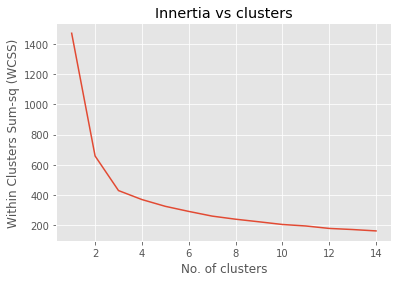

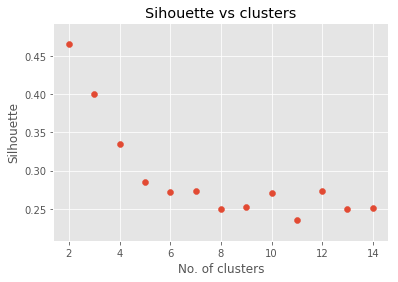

In [161]:
opt_clusters(X, StandardScaler, 15)

In [162]:
predicted

array([5, 5, 4, 4, 5, 4, 5, 4, 8, 5, 2, 5, 4, 5, 5, 4, 4, 5, 4, 1, 5, 5,
       5, 9, 5, 5, 1, 9, 5, 1, 9, 5, 2, 5, 5, 5, 2, 8, 5, 7, 5, 5, 4, 2,
       5, 5, 5, 5, 5, 5, 5, 2, 2, 5, 5, 5, 5, 5, 5, 9, 9, 9, 4, 1, 9, 4,
       5, 5, 5, 1, 0, 2, 2, 8, 2, 2, 2, 0, 0, 8, 2, 6, 6, 0, 0, 8, 8, 0,
       6, 6, 0, 8, 8, 6, 0, 2, 0, 0, 0, 8, 2, 8, 6, 0, 0, 8, 8, 8, 0, 8,
       8, 0, 8, 6, 6, 0, 6, 8, 8, 0, 6, 8, 2, 8, 4, 6, 0, 8, 0, 2, 8, 8,
       2, 2, 2, 5, 8, 2, 2, 2, 1, 7, 7, 1, 3, 3, 9, 1, 1, 3, 1, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 9, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 9, 1, 1, 1, 1, 7, 3, 3, 3, 7, 1, 3, 1, 1, 3, 1, 1, 1, 1,
       1, 4, 1, 4, 1, 7, 1, 1, 1, 7, 1, 1])